# Homework 3
Paula Campaña Donoso (00215572)

In [178]:
import time
import pandas as pd

### 1. Merge two sorted lists

1. Assume you have two sorted linked lists. Use **recursion** to merge these lists and return a new sorted list.

For example:

- Input:

> L1 = 1 -> 3 -> 5 -> 7 -> null

> L2 = 2 -> 4 -> 6 -> null

- Output:

> L4 = 1 -> 2 -> 3-> 4 -> 5 -> 6 -> 7 -> null

2. Calculate complexity

In [179]:
#1. Usando recursion
class Node:
    def __init__(self, val):
        self.val = val
        self.next_node = None
    def set_next_node(self, next_node):
        self.next_node = next_node
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node

    def list_traversed(self):
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node

    def insert_head(self, new_node):
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null
        new_node.set_next_node(self.head_node)
        self.head_node = new_node

    def insert_tail(self, new_node):
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null
        node = self.head_node
        prev = None
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)

    def insert_middle(self, new_node, value):
        # insert in the middle
        # A -> B -> C -> null
        # A -> B -> R -> C -> null
        node = self.head_node
        while node.val != value:
            node = node.next_node
        if node:
            new_node.set_next_node(node.next_node)
            node.set_next_node(new_node)
        else:
            self.insert_tail(new_node)

In [180]:
#Defino funcion merge para poder ir comparando los valores entre las listas e ir juntando los valores de ambas listas en orden comparando cual es mayor y menor y agregando al siguiente espacio
def merge(Lista1, Lista2):
    if (Lista1 == None):
        return Lista2
    if (Lista2 == None):
        return Lista1
    if (Lista1.val < Lista2.val):
        Lista1.next_node = merge(Lista1.next_node, Lista2)
        return Lista1
    else:
        Lista2.next_node = merge(Lista1, Lista2.next_node)
        return Lista2

In [181]:
#Uso el ejemplo de valores propuestos en el problema
lista1 = Singly_linked_list(Node(1))
lista1.insert_tail(Node(3))
lista1.insert_tail(Node(5))
lista1.insert_tail(Node(7))
lista1.list_traversed()

lista2 = Singly_linked_list(Node(2))
lista2.insert_tail(Node(4))
lista2.insert_tail(Node(6))
lista2.insert_tail(Node(8))
lista2.list_traversed()

1
3
5
7
2
4
6
8


In [182]:
union = merge(lista1.head_node,lista2.head_node)

In [183]:
union = Singly_linked_list(union)
union.list_traversed()

1
2
3
4
5
6
7
8


2. La complejidad de este algoritmo se lo puede establecer como O(n), esto se debe a que en la clase Singly_linked_list estoy usando funciones que me permitan incluir datos a un arreglo ya sea el principio, mitad o final y esto depende de la cantidad de datos que hay en este caso n. Luego se tiene la funcion merge, aqui va comparando dato por dato para ir viendo como juntar ambos arreglos, esto lo que indica es que al usar el lazo if e ir comparando todos los numeros entre si, esto se vuelve una complejidad de n ya que depende de la cantidad de datos en cada lista para irles juntando en una lista final, por lo que se tiene al final una complejidad de O(n).

### 2. Implement quick sort

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class.
2. Use a couple of parragraphs to explain the steps of divide and conquer:
    - how/where do you divide?
    - where/what do you conquer?
    - how/what do you combine?
3. Analyze complexity

In [220]:
#Funcion recursiva que me permite tener un valor de pivot e ir comparando y arreglando cada valor para tener un nuevo arreglo
def division(array, menor, mayor):
    pivot = array[mayor]
    i = menor - 1
    for k in range(menor, mayor):
        if array[k] <= pivot:
            i = i + 1
            (array[i], array[k]) = (array[k], array[i])
    (array[i + 1], array[mayor]) = (array[mayor], array[i + 1])
    return i + 1
#Funcion que me permite ir juntando los valores en un arreglo para que este ordenado
def quick_sort(array, menor, mayor):
    if menor < mayor:
        p = division(array, menor, mayor)
        quick_sort(array, menor, p - 1)
        quick_sort(array, p + 1, mayor)

In [221]:
array = [5,3,9,2,8]
quick_sort(array,0,len(array) - 1)
print(array)

[2, 3, 5, 8, 9]


2. Para esta funcion de division lo que hace es seleccionar mi valor final como pivot, esto me permite dividir la funcion del pivot con el resto de valores para luego poderles ir comparando. Una vez establecido este pivto lo que hace es ir comparando y aqui se aplica lo que se llama conquer, lo que quiero decir es que el valor del pivot va comparando su valor con los valores a su izquierda de manera recursiva, ya que compara cual de los dos es mayor si el pivot o el valor a comparar y luego hace un cambio de posicion entre la posicion del valor en el arreglo i con el arreglo en k. Una vez hecho este proceso para todos los valores al final se hace el proceso de combinar, aqui lo que se hace es juntar todos los valores en un arreglo y luego se pide que imprima los valores de ese arreglo, mostrando asi un arreglo de valores en orden.

3. La complejidad en este algoritmo se lo puede establecer como O(nlog(n)), esto se debe a la composicion de ambas funciones, division y quick_sort, en el algoritmo. Si vemos la primera funcion la cual es la de la division, esto es una funcion recursiva, lo que significa que se va repitiendo el mismo proceso para cada valor, aqui se divide, se hace conquer y por ultimo se combina, ya que este proceso se hace para cada valor del arreglo y esto se va dividiendo para cada valor del arreglo entonces se tiene un runtime tipo logaritmico, lo que muestra que en esa funcion es una complejida de O(log(n)). Luego se tiene la siguiente funcion la cual es quick_sort, aqui lo que se hace es ir juntando todos los valores ya comparados en un arreglo final, por lo que esto tiene un runtime de O(n), ya que se va uniendo la cantidad de valores que se tenga es decir n valores, justificando asi que la complejidad es de O(n). Una vez que se tiene ambas complejidades al revisar el algoritmo final se puede ver que se tiene una complejidad final de O(nlog(n)).

### 3. Compare quick sort and merge sort

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

In [186]:
#Utilizando ayuda de internet en la pagina de geek for geeks utilizo la funcion decoradora de tiempo para poder calcular el tiempo de ejecucion, y luego llamo a mi funcion @timer_func para funcion de sum1 y sum2
from time import time
def runtime(func):
    def wrap_func(*args, **kwargs):
        t1 = time()*10**12
        t2 = time()*10**12
        return t2-t1
    return wrap_func

In [187]:
#Funcion que se utiliza de merge_sort fue dada en clase
@runtime
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])
    right = merge_sort(nums[pivot:])
    return merge(left, right)


def merge(left, right):
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1

    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])

    return sorted_list

In [188]:
#Se genera permutaciones aleatorias con la funcion random
import random
import numpy as np
n = []
array = []
array_runtime = []
for f in range(1000):
    n = np.random.permutation(10000)
    array.append(n)

In [189]:
for i in range(1000):
    array_runtime.append(merge_sort(array[i]))

In [190]:
#Se utiliza la misma funcion de quick_sort implementada en el ejercicio anterior
def division(array, menor, mayor):
    pivot = array[mayor]
    i = menor - 1
    for k in range(menor, mayor):
        if array[k] <= pivot:
            i = i + 1
            (array[i], array[k]) = (array[k], array[i])
    (array[i + 1], array[mayor]) = (array[mayor], array[i + 1])
    return i + 1

@runtime
def quick_sort(array, menor, mayor):
    if menor < mayor:
        p = division(array, menor, mayor)
        quick_sort(array, menor, p - 1)
        quick_sort(array, p + 1, mayor)

In [191]:
array_runtime2 = []
for i in range(1000):
    array_runtime2.append(quick_sort(array[i]))

In [192]:
df1 = pd.DataFrame(zip(array_runtime,array_runtime2))
df1.columns = [ 'Runtime de merge_sort','Runtime de quick_sort']
df1

,Runtime de merge_sort,Runtime de quick_sort
0,1048576.0,786432.0
1,0.0,0.0
2,0.0,0.0
3,1310720.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


<AxesSubplot: >

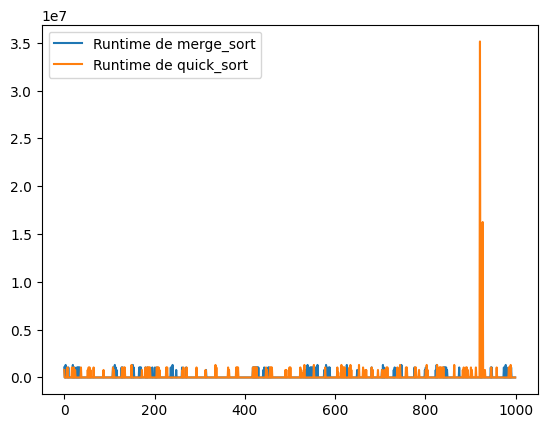

In [193]:
df1.plot()

4. Ambas funciones, merge sort y quick_sort permiten la recursividad en el momento de dividir, conquer y combinar, ademas ambas tienen una misma complejidad la cual es O(nlog(n)), esto claramente se puede ver en la grafica que ,muestra la relacion entre ambas funciones mostrando que en promedio son muy parecidas a excepcion de algunos picos que se muestran con respecto a quick_sort. Por un lado merge sort divide al arreglo en la mitad y luego vuelve a dividir en la mitad y va comparando datos, mientras que con quick_sort se tiene un pivot en uno de los limites del arreglo y va comparando y ordenando asi cada valor. Por esa razon se puede decir que ambas son eficiencientes y que ambos se pueden usar para casos similares, ya que la forma de dividir es diferente pero no impide que se llegue al mismo resultado. Es posible que se pueda decir que merge sort sea un poco mas rapido por lo que va dividiendo en secciones mas pequeñas y al final junta todo mientras que quick_sort compara uno por uno y va ordenando, sin embargo ambas tienen la misma complejidad lo que me muestra que ambas tienen una eficiencia demasiado similar y ambas se pueden usar.

### 4. Implement factorials with recursion

Recall that a factorial number is defined as:

$k! = k \times (k-1) \times (k-2) \times ... \times 2 \times 1$

For example: $3! = 3 \times 2 \times 1 = 6$

1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it.
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?


In [194]:
#Se define la funcion factorial para calcular el factorial del numero ingresado
def factorial(n):
    return 1 if (n == 1 or n == 0) else n * factorial(n - 1)

In [195]:
factorial(10)

3628800

In [210]:
#Se calcula el tiempo que le toma correr cada valor con la funcion factorial
@runtime
def factorial(n):
    return 1 if (n == 1 or n == 0) else n * factorial(n - 1)
tiempo1 = []
for i in range (0, 5000):
    resultado = factorial(i)
    tiempo1.append(resultado)

In [211]:
tiempo1

[1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1310720.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1310720.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 1048576.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 524288.0,
 1310720.0,
 0.0,
 0.0,
 1310720.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 2097152.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 786432.0,
 1310720.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 1048576.0,
 1048576.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 1048576.0,
 1048576.0,
 786432.0,
 1310720.0

In [212]:
df2 = pd.DataFrame(zip(tiempo1))
df2.columns = ['Runtime de factorial']
df2

,Runtime de factorial
0,1048576.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4995,0.0
4996,0.0
4997,0.0
4998,786432.0


<AxesSubplot: >

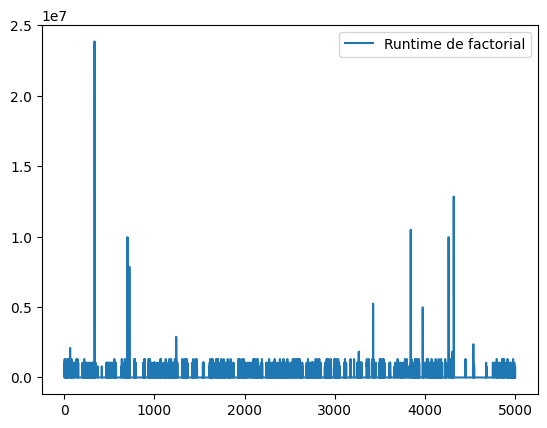

In [213]:
df2.plot()

4. Tomando en cuenta la funcion factorial que se repite de manera recursiva por una cantidad de n datos, la complejidad se la puede establecer como O(n), esta funcion lo que hace es aplicar el factorial a un numero ingresado e ir guardando en un arreglo. Esto no divide ni hace conquer por lo que solo se repite n veces y me da la complejidad final de O(n).

In [228]:
#Ahora se aplica memoization para tener ya guardado el valor de factorial en el arreglo
memoria = {}
def factorialConMemoria(n):
    if n in memoria:
        return memoria[n]
    elif n == 0:
        return 1
    else:
        dato = factorialConMemoria(n-1) * n
        memoria[n] = dato
        return dato

In [229]:
factorialConMemoria(10)

3628800

In [230]:
#Se calcula el tiempo que le toma correr a la funcion de memoization que la llame factorialConMemoria
memoria = {}
@runtime
def factorialConMemoria(n):
    if n in memoria:
        return memoria[n]
    elif n == 0:
        return 1
    else:
        dato = factorialConMemoria(n-1) * n
        memoria[n] = dato
        return dato
tiempo2 = []
for i in range (0, 5000):
    resultado = factorialConMemoria(i)
    tiempo2.append(resultado)

In [231]:
tiempo2

[1835008.0,
 0.0,
 1310720.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 1048576.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 1310720.0,
 0.0,
 786432.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 786432.0,
 0.0,
 0.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1310720.0,
 0.0,
 786432.0,
 0.0,
 1048576.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [232]:
df3 = pd.DataFrame(zip(tiempo2))
df3.columns = ['Runtime de factorial con memoria']
df3

,Runtime de factorial con memoria
0,1835008.0
1,0.0
2,1310720.0
3,0.0
4,1048576.0
...,...
4995,1048576.0
4996,0.0
4997,786432.0
4998,0.0


<AxesSubplot: >

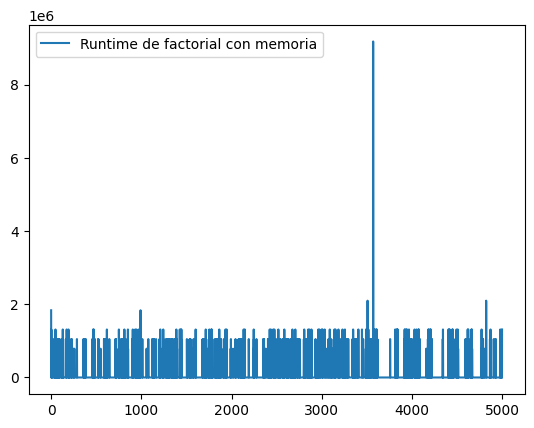

In [233]:
df3.plot()

7. Para esta funcion que utiliza memoization lo que hace es igual hacer la funcion de factorial de un numero, pero ahora lo que tambien hace es ir comparando que ese valor no este ya guardado en el arreglo, si es asi, entonces se sigue al siguiente dato, esto permite optimizar el proceso de factorial de un dato, por lo que al ir comparando ambos datos es una comparacion de datos de manera constante, por lo que se puede decir que la complejidad es de O(1), al tener una comparacion de datos que ya se encuentran guardados en el arreglo.

8. La primera implementacion con respecto a la segunda implementacion se comparan al ver que la una tiene que correr el proceso de factorial para cada dato ingresado, pero en cambio en la segunda implementacion va revisando que no este hecho el factorial de un numero para hacer el factorial de ese numero, sino, sigue con el siguiente hasta tener el factorial de todos los datos que se encuentren ingresados. La primera funcion me da una complejidad de O(n), mientras que la que usa memoization tiene una complejidad de O(1), sin embargo, al tener la funcion de memoization, esto si me ayuda a optimizar ya que me permite seguir con los siguientes datos los cuales no he calculado el factorial y mi tiempo seria mas rapido que ir calculando el factorial de cada numero que tengo o no guardado.